# Práctica 0: Python

Greta y Héloïse

# Calcula integral

In [88]:
import numpy as np

def integra_mc_iter(fun, a, b, num_puntos=10000):
    #Calcula la integral de f un entre a y b por el método de Monte Carlo, version iterativa
    M = max(fun(x) for x in np.linspace(a, b, num=100))
    min_f = min(fun(x) for x in np.linspace(a, b, num=100))
    n_debajo = 0
    
    for i in range(num_puntos):
        px = np.random.uniform(a, b)
        py = np.random.uniform(min_f, M)
        if py < fun(px) :
            n_debajo += 1
            
    I = (n_debajo / num_puntos) * (b - a) * M
    return I

In [89]:
import numpy as np

def integra_mc_vect(fun, a, b, num_puntos=10000):
    #Calcula la integral de f un entre a y b por el método de Monte Carlo, version vectorizada
    M = max(fun(x) for x in np.linspace(a, b, num=100))
    min_f = min(fun(x) for x in np.linspace(a, b, num=100))
    px = np.random.uniform(a, b, num_puntos)
    py = np.random.uniform(min_f, M, num_puntos)
    num_debajo = np.sum(py < fun(px))
    I = num_debajo / num_puntos * (b - a) * M
    return I


In [90]:
import numpy as np
from scipy.integrate import quad

# Ejemplo de uso
def f(x):
    return np.sin(x)

a, b = 0, np.pi
resultado_mc_iter = integra_mc_iter(f, a, b, 10000)
resultado_mc_vect = integra_mc_iter(f, a, b, 10000)
resultado_quad, _ = quad(f, a, b)

print("Resultado método Monte Carlo, iterativo:", resultado_mc_iter)
print("Resultado método Monte Carlo, vectorial:", resultado_mc_vect)
print("Resultado método scipy.integrate.quad:", resultado_quad)

Resultado método Monte Carlo, iterativo: 2.0031414633772058
Resultado método Monte Carlo, vectorial: 1.9921472731281535
Resultado método scipy.integrate.quad: 2.0


# Comparativa de las dos versiones

In [91]:
import matplotlib.pyplot as plt
import time

def compara_tiempos():
    sizes = np.linspace(100, 10000000, 20)
    
    times_iter = []
    times_vect = []
    
    a, b = 0, np.pi

    for size in sizes:
        tic = time.process_time()
        iter = integra_mc_iter(f, a, b, 10000)
        toc = time.process_time()
        times_iter += [1000 * (toc - tic)]
        
        tic = time.process_time()
        vect = integra_mc_vect(f, a, b, 10000)
        toc = time.process_time()
        times_vect += [1000 * (toc - tic)]
        
    plt.figure()
    plt.scatter(sizes, times_iter, c='red', label='bucle')
    plt.scatter(sizes, times_vect, c='blue', label='vector')
    plt.legend()
    #plt.savefig("compara_tiempos.png")
    plt.show()

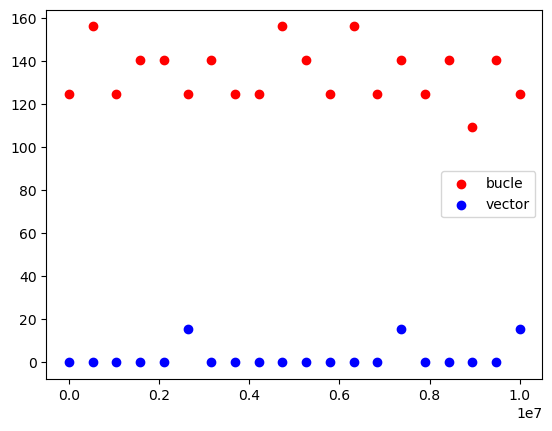

In [92]:
compara_tiempos()